In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import imdb
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

C:\Users\Sang\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Sang\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
from tensorflow.keras.preprocessing import sequence
max_len = 100
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [4]:
x_train.shape

(25000, 100)

In [5]:
y_test.shape

(25000,)

In [6]:
y_train.shape

(25000,)

In [7]:
y_test[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [8]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [9]:
y_test_one_hot.shape

(25000, 2)

In [10]:
y_test_one_hot[0]

array([1., 0.], dtype=float32)

In [11]:
from tensorflow.keras.layers import Input, Embedding, LSTM, SimpleRNN, Dense, Lambda
from tensorflow.keras.models import Model

In [12]:
# https://faroit.com/keras-docs/2.0.2/getting-started/functional-api-guide/
# Headline input: meant to receive sequences of "max_len" integers, between 0 and 10000.
main_input = Input(shape=(max_len,), dtype='int32')

# This embedding layer will encode the input sequence
# into a sequence of dense 64-dimensional vectors.
x = Embedding(output_dim=64, input_dim=max_features, input_length=max_len)(main_input)

# A SimpleRNN will transform the vector sequence into a single vector,
# containing information about the entire sequence
RNN_out = SimpleRNN(32, return_sequences=True)(x)
# this will return 100x32 for a document 

# 평균을 구함 => 하나의 문서에 대해서 32 차원 벡터 출력
out = Lambda(lambda x: tf.math.reduce_mean(x, axis=1))(RNN_out)


In [13]:
out.shape

TensorShape([None, 32])

In [14]:
x = Dense(16, activation='relu')(out)
main_output = Dense(2, activation='softmax')(x)
model = Model(inputs=main_input,outputs=main_output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 64)           640000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 100, 32)           3104      
_________________________________________________________________
lambda (Lambda)              (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 34        
Total params: 643,666
Trainable params: 643,666
Non-trainable params: 0
_______________________________________________________

In [15]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [16]:
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 11s 69ms/step - loss: 0.5097 - acc: 0.7485 - val_loss: 0.4429 - val_acc: 0.7924
Epoch 2/10
157/157 [==============================] - 11s 68ms/step - loss: 0.3212 - acc: 0.8674 - val_loss: 0.3911 - val_acc: 0.8240
Epoch 3/10
157/157 [==============================] - 11s 68ms/step - loss: 0.2635 - acc: 0.8943 - val_loss: 0.3674 - val_acc: 0.8364
Epoch 4/10
157/157 [==============================] - 11s 68ms/step - loss: 0.2300 - acc: 0.9115 - val_loss: 0.3531 - val_acc: 0.8440
Epoch 5/10
157/157 [==============================] - 11s 68ms/step - loss: 0.2021 - acc: 0.9247 - val_loss: 0.3836 - val_acc: 0.8324
Epoch 6/10
157/157 [==============================] - 11s 67ms/step - loss: 0.1805 - acc: 0.9335 - val_loss: 0.3958 - val_acc: 0.8308
Epoch 7/10
157/157 [==============================] - 11s 68ms/step - loss: 0.1537 - acc: 0.9459 - val_loss: 0.5281 - val_acc: 0.8170
Epoch 8/10
157/157 [==============================] - 11s 67ms

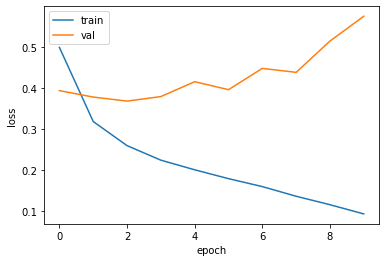

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

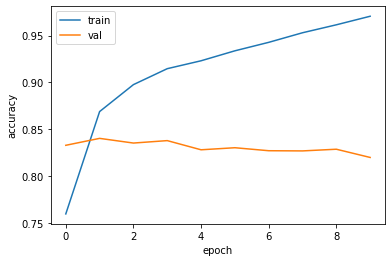

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [12]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

782/782 [==============================] - 6s 8ms/step - loss: 0.6238 - acc: 0.8060


In [10]:
print('test_acc:', test_acc)

test_acc: 0.84544
